In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('movies.csv')
df.head()

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,7.8,2022,December,PG-13,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,"$350,000,000","$2,267,946,983",United States
1,Guillermo del Toro's Pinocchio,7.6,2022,December,PG,117,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,"$35,000,000","$108,967","United States, Mexico, France"
2,Bullet Train,7.3,2022,August,R,127,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,"$85,900,000","$239,268,602","Japan, United States"
3,The Banshees of Inisherin,7.8,2022,November,R,114,Martin McDonagh,"Colin Farrell, Brendan Gleeson, Kerry Condon, ...","Comedy, Drama",Ireland,Unknown,"$19,720,823","Ireland, United Kingdom, United States"
4,M3gan,6.4,2022,December,PG-13,102,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,"$12,000,000","$171,253,910",United States


In [5]:
df.describe()

,Rating,Year
count,1999.000000,2000.000000
mean,6.666583,2012.500000
std,0.911704,5.767723
min,1.900000,2003.000000
25%,6.150000,2007.750000
50%,6.700000,2012.500000
75%,7.300000,2017.250000
max,9.600000,2022.000000


In [10]:
df.isna().sum()

Title                 0
Rating                1
Year                  0
Month                 0
Certificate          34
Runtime               0
Directors             0
Stars                 0
Genre                 0
Filming_location      0
Budget                0
Income                0
Country_of_origin     0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              2000 non-null   object 
 1   Rating             1999 non-null   float64
 2   Year               2000 non-null   int64  
 3   Month              2000 non-null   object 
 4   Certificate        1966 non-null   object 
 5   Runtime            2000 non-null   object 
 6   Directors          2000 non-null   object 
 7   Stars              2000 non-null   object 
 8   Genre              2000 non-null   object 
 9   Filming_location   2000 non-null   object 
 10  Budget             2000 non-null   object 
 11  Income             2000 non-null   object 
 12  Country_of_origin  2000 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 203.2+ KB


In [14]:
df[df['Rating'].isna()]

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
85,A Man Called Otto,NaN,2022,January,PG-13,126,Marc Forster,"Tom Hanks, Rachel Keller, Manuel Garcia Rulfo,...","Comedy, Drama",USA,Unknown,Unknown,"Sweden, United States"


In [19]:
df['Certificate'].value_counts()


R            867
PG-13        714
PG           225
Not Rated     61
TV-MA         40
G             22
TV-14         12
TV-PG          9
NC-17          6
Unrated        6
TV-G           3
TV-Y7          1
Name: Certificate, dtype: int64

In [21]:
df['Month'].value_counts()

November     260
December     249
October      187
June         166
July         152
September    151
March        150
August       149
January      148
May          144
April        121
February     121
2014           1
2008           1
Name: Month, dtype: int64

In [28]:
df['Directors'].value_counts()

Ridley Scott        13
Steven Spielberg    12
Antoine Fuqua       11
Shawn Levy          10
Clint Eastwood      10
                    ..
Noam Murro           1
Gary Shore           1
Dami n Szifron       1
Emerald Fennell      1
Chris Kentis         1
Name: Directors, Length: 1082, dtype: int64

In [29]:
(df['Directors'].values == 'Unknown').sum(), (df['Stars'].values == 'Unknown').sum(), (df['Genre'].values == 'Unknown').sum()

(0, 0, 0)

In [77]:
(df['Filming_location'].values == 'Unknown').sum(), (df['Country_of_origin'].values == 'Unknown').sum(), 

(62, 0)

In [76]:
(df['Income'].values == 'Unknown').sum(), (df['Budget'].values == 'Unknown').sum(), (df['Runtime'].values == 'Unknown').sum()

(127, 284, 0)

#### Data Cleaning

In [39]:
df[df['Month']=='2014']
df[df['Month']=='2008']

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
1439,The Lazarus Project,6.1,2008,2008,PG-13,100,John Glenn,"Paul Walker, Piper Perabo, Brooklynn Proulx, B...","Drama, Mystery, Thriller",Canada,"$9,750,000","$9,162","United States, Canada, United Kingdom"


In [40]:
df.loc[df['Month'] == '2008', 'Month']

1439    2008
Name: Month, dtype: object

In [42]:
df=df.replace(to_replace=['2008','2014'],value=['June','July'])

In [43]:
df['Month'].value_counts()

November     260
December     249
October      187
June         167
July         153
September    151
March        150
August       149
January      148
May          144
April        121
February     121
Name: Month, dtype: int64

In [55]:
df.isnull().sum()

Title                 0
Rating                0
Year                  0
Month                 0
Certificate          34
Runtime               0
Directors             0
Stars                 0
Genre                 0
Filming_location      0
Budget                0
Income                0
Country_of_origin     0
dtype: int64

In [48]:
df['Rating']=df['Rating'].fillna(df['Rating'].mean())

In [57]:
df.isna().sum()

Title                0
Rating               0
Year                 0
Month                0
Certificate          0
Runtime              0
Directors            0
Stars                0
Genre                0
Filming_location     0
Budget               0
Income               0
Country_of_origin    0
dtype: int64

In [56]:
df=df.dropna()

In [58]:
conversion_dict = {
    '$': 1.0,
    '€': 1.07,
    '£': 1.21,
    '₩': 0.00078,
    'C': 0.73,
    '₹': 0.012,
    '¥': 0.0075,
    'A': 0.68,
    'S': 0.095,
    'D': 0.14,
    'N': 0.10 
}

In [61]:
from re import sub
for idx, value in enumerate(df['Budget']):
  if str(df.iloc[idx].Budget)[0] in conversion_dict.keys():
    df.loc[df['Budget'] == value, 'Budget'] = int(sub("[^0-9]", "", value)) * conversion_dict[df.iloc[idx].Budget[0]]

In [62]:
df[:10]

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,7.8,2022,December,PG-13,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,350000000.0,"$2,267,946,983",United States
1,Guillermo del Toro's Pinocchio,7.6,2022,December,PG,117,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,35000000.0,"$108,967","United States, Mexico, France"
2,Bullet Train,7.3,2022,August,R,127,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,85900000.0,"$239,268,602","Japan, United States"
3,The Banshees of Inisherin,7.8,2022,November,R,114,Martin McDonagh,"Colin Farrell, Brendan Gleeson, Kerry Condon, ...","Comedy, Drama",Ireland,Unknown,"$19,720,823","Ireland, United Kingdom, United States"
4,M3gan,6.4,2022,December,PG-13,102,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,12000000.0,"$171,253,910",United States
5,Emancipation,6.1,2022,December,R,132,Antoine Fuqua,"Will Smith, Ben Foster, Charmaine Bingwa, Gilb...","Action, Thriller",Unknown,120000000.0,Unknown,United States
6,Amsterdam,6.1,2022,October,R,134,David O Russell,"Christian Bale, Margot Robbie, John David Wash...","Comedy, Drama, History",USA,80000000.0,"$31,245,810","United States, Japan"
7,Violent Night,6.9,2022,December,R,112,Tommy Wirkola,"David Harbour, John Leguizamo, Beverly D Angel...","Action, Comedy, Crime",Canada,20000000.0,"$59,595,460","United States, Canada"
8,The Whale,7.8,2022,December,R,117,Darren Aronofsky,"Brendan Fraser, Sadie Sink, Ty Simpkins, Hong ...",Drama,USA,10000000.0,"$31,104,312",United States
9,The Fabelmans,7.6,2022,November,PG-13,151,Steven Spielberg,"Michelle Williams, Gabriel LaBelle, Paul Dano,...",Drama,USA,40000000.0,"$9,500,361",United States


In [63]:
(df['Budget']=='Unkown').sum()

0

In [64]:
for idx, value in enumerate(df['Income']):
  if str(df.iloc[idx].Income)[0] in conversion_dict.keys():
    df.loc[df['Income'] == value, 'Income'] = int(sub("[^0-9]", "", value)) * conversion_dict[df.iloc[idx].Income[0]]

In [65]:
df[:10]

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,7.8,2022,December,PG-13,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,350000000.0,2267946983.0,United States
1,Guillermo del Toro's Pinocchio,7.6,2022,December,PG,117,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,35000000.0,108967.0,"United States, Mexico, France"
2,Bullet Train,7.3,2022,August,R,127,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,85900000.0,239268602.0,"Japan, United States"
3,The Banshees of Inisherin,7.8,2022,November,R,114,Martin McDonagh,"Colin Farrell, Brendan Gleeson, Kerry Condon, ...","Comedy, Drama",Ireland,Unknown,19720823.0,"Ireland, United Kingdom, United States"
4,M3gan,6.4,2022,December,PG-13,102,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,12000000.0,171253910.0,United States
5,Emancipation,6.1,2022,December,R,132,Antoine Fuqua,"Will Smith, Ben Foster, Charmaine Bingwa, Gilb...","Action, Thriller",Unknown,120000000.0,Unknown,United States
6,Amsterdam,6.1,2022,October,R,134,David O Russell,"Christian Bale, Margot Robbie, John David Wash...","Comedy, Drama, History",USA,80000000.0,31245810.0,"United States, Japan"
7,Violent Night,6.9,2022,December,R,112,Tommy Wirkola,"David Harbour, John Leguizamo, Beverly D Angel...","Action, Comedy, Crime",Canada,20000000.0,59595460.0,"United States, Canada"
8,The Whale,7.8,2022,December,R,117,Darren Aronofsky,"Brendan Fraser, Sadie Sink, Ty Simpkins, Hong ...",Drama,USA,10000000.0,31104312.0,United States
9,The Fabelmans,7.6,2022,November,PG-13,151,Steven Spielberg,"Michelle Williams, Gabriel LaBelle, Paul Dano,...",Drama,USA,40000000.0,9500361.0,United States


#### Analysis

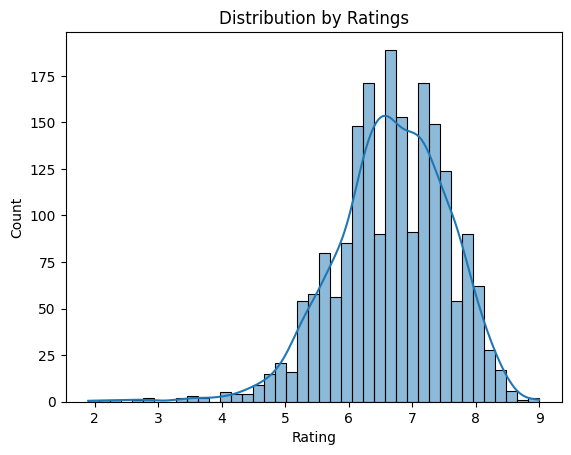

In [70]:
import seaborn as sns

sns.histplot(data=df,x=df['Rating'],kde=True)
plt.title('Distribution by Ratings')
plt.show()

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1646 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1646 non-null   object 
 1   Rating             1646 non-null   float64
 2   Year               1646 non-null   int64  
 3   Month              1646 non-null   object 
 4   Certificate        1646 non-null   object 
 5   Runtime            1646 non-null   object 
 6   Directors          1646 non-null   object 
 7   Stars              1646 non-null   object 
 8   Genre              1646 non-null   object 
 9   Filming_location   1646 non-null   object 
 10  Budget             1646 non-null   float64
 11  Income             1646 non-null   float64
 12  Country_of_origin  1646 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 180.0+ KB


In [82]:
(df['Budget']=="Unknown").sum()

0

In [80]:
df=df[(df['Budget']!='Unknown')& (df['Income']!='Unknown')]

In [87]:
df['Budget']=df['Budget'].astype(float)
df['Income']=df['Income'].astype(float)

C:\Users\ESTHER\AppData\Local\Temp\ipykernel_9972\2326688340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Budget']=df['Budget'].astype(float)
C:\Users\ESTHER\AppData\Local\Temp\ipykernel_9972\2326688340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Income']=df['Income'].astype(float)


In [89]:
df[:5]

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,7.8,2022,December,PG-13,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,350000000.0,2.267947e+09,United States
1,Guillermo del Toro's Pinocchio,7.6,2022,December,PG,117,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,35000000.0,1.089670e+05,"United States, Mexico, France"
2,Bullet Train,7.3,2022,August,R,127,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,85900000.0,2.392686e+08,"Japan, United States"
4,M3gan,6.4,2022,December,PG-13,102,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,12000000.0,1.712539e+08,United States
6,Amsterdam,6.1,2022,October,R,134,David O Russell,"Christian Bale, Margot Robbie, John David Wash...","Comedy, Drama, History",USA,80000000.0,3.124581e+07,"United States, Japan"


#### Top 20  movies based on profit

In [90]:
df['Profit']=(df['Income']-df['Budget']).round(-6)

C:\Users\ESTHER\AppData\Local\Temp\ipykernel_9972\155312570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Profit']=(df['Income']-df['Budget']).round(-6)


In [91]:
df.head()

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin,Profit
0,Avatar: The Way of Water,7.8,2022,December,PG-13,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,350000000.0,2.267947e+09,United States,1.918000e+09
1,Guillermo del Toro's Pinocchio,7.6,2022,December,PG,117,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,35000000.0,1.089670e+05,"United States, Mexico, France",-3.500000e+07
2,Bullet Train,7.3,2022,August,R,127,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,85900000.0,2.392686e+08,"Japan, United States",1.530000e+08
4,M3gan,6.4,2022,December,PG-13,102,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,12000000.0,1.712539e+08,United States,1.590000e+08
6,Amsterdam,6.1,2022,October,R,134,David O Russell,"Christian Bale, Margot Robbie, John David Wash...","Comedy, Drama, History",USA,80000000.0,3.124581e+07,"United States, Japan",-4.900000e+07


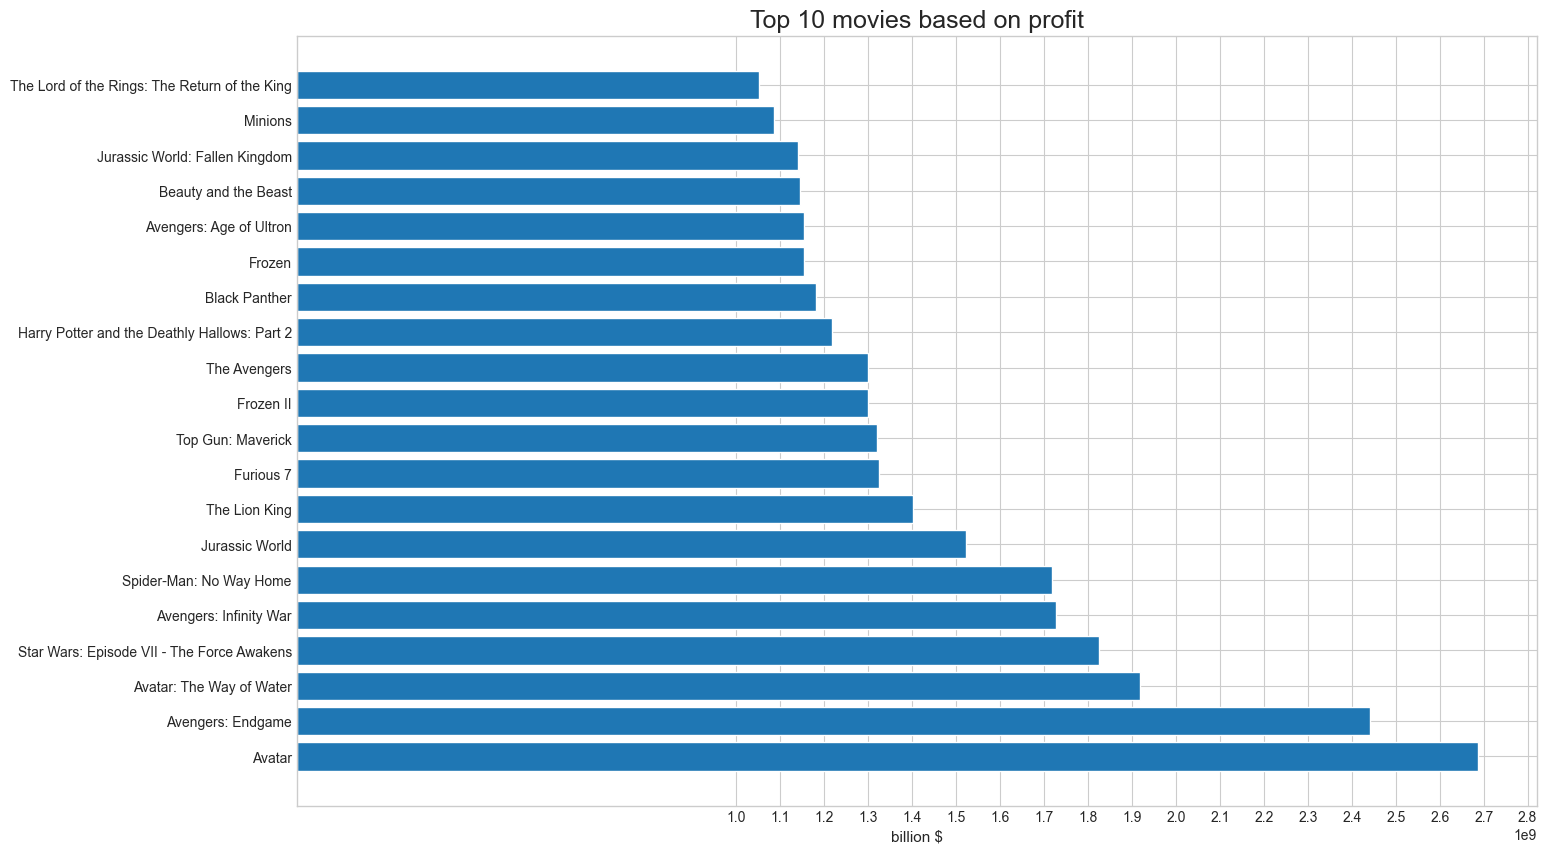

In [99]:
top_movies=df[['Title','Profit']].sort_values('Profit',ascending=False)[:20]  #show the top 20movies based on their profit

#plt.style.use("seaborn-whitegrid")
sns.set_style('whitegrid')
fig = plt.figure(figsize=(16, 10))
plt.xticks(ticks=np.arange(1, 3, 0.1) * 1e9)

plt.barh(top_movies.Title,top_movies.Profit)
plt.title('Top 10 movies based on profit', fontsize=18)
plt.xlabel("billion $", fontsize=11)
plt.show()